Import your data into a Pandas DataFrame.

Merge your DataFrames.

Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.

Determine the mean, median, and mode for the following:
- The total number of rides for each city type.
- The average fares for each city type.
- The total number of drivers for each city type.

Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:

- The number of rides for each city type.
- The fares for each city type.
- The number of drivers for each city type.

Create a pie chart that visualizes each of the following data for each city type:

- The percent of total fares.
- The percent of total rides.
- The percent of total drivers.


In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics

In [2]:
# Load csv's
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [3]:
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [5]:
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
ride_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [7]:
# Find out how many different types there are
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
sum(city_data_df["type"]=="Rural")

18

In [9]:
# Merge df's
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [10]:
# Create Urban city df
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"].reset_index(drop=True)
urban_cities_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [11]:
# Create suburban cities df
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"].reset_index(drop=True)

suburban_cities_df

,city,date,fare,ride_id,driver_count,type
0,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
2,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
3,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
4,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban
...,...,...,...,...,...,...
620,West Hannah,2019-03-02 17:06:03,13.92,7388937249208,12,Suburban
621,Lake Robertside,2019-04-03 03:27:45,12.76,1301757653884,4,Suburban
622,Colemanland,2019-01-10 06:49:58,27.70,8704067171414,23,Suburban
623,East Marymouth,2019-02-12 23:18:53,47.41,7409660239158,5,Suburban


In [12]:
# Create rural cities df
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"].reset_index(drop=True)
rural_cities_df


,city,date,fare,ride_id,driver_count,type
0,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
1,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
3,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
4,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
120,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
121,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
122,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
123,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [13]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [14]:
# Suburban ride count
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [15]:
# Rural ride count
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [16]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [17]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [18]:
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [19]:
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [20]:
# Get avg number of drivers by city type
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count

city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

In [21]:
# Suburban avg drivers
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count

city
Barronchester         11.0
Bethanyland           22.0
Brandonfort           10.0
Colemanland           23.0
Davidfurt             23.0
East Aaronbury         7.0
East Danielview       22.0
East Kentstad         20.0
East Marymouth         5.0
Grayville              2.0
Josephside            25.0
Lake Ann               3.0
Lake Omar             22.0
Lake Robertside        4.0
Lake Scott            23.0
Lewishaven            23.0
Lewisland              4.0
Mezachester           14.0
Myersshire            19.0
New Olivia            20.0
New Raymond           17.0
New Shannonberg       20.0
Nicolechester         19.0
North Jeffrey         11.0
North Richardhaven     1.0
North Timothy          7.0
Port Shane             7.0
Rodriguezview         20.0
Sotoville             10.0
South Brenda           1.0
South Teresa          21.0
Veronicaberg          20.0
Victoriaport          16.0
West Hannah           12.0
West Kimmouth          4.0
Williamsonville        2.0
Name: driver_count, dty

In [22]:
# Rural avg drivers
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count

city
Bradshawfurt         7.0
Garzaport            7.0
Harringtonfort       4.0
Jessicaport          1.0
Lake Jamie           4.0
Lake Latoyabury      2.0
Michaelberg          6.0
New Ryantown         2.0
Newtonview           1.0
North Holly          8.0
North Jaime          1.0
Penaborough          6.0
Randallchester       9.0
South Jennifer       7.0
South Marychester    1.0
South Saramouth      7.0
Taylorhaven          1.0
West Heather         4.0
Name: driver_count, dtype: float64

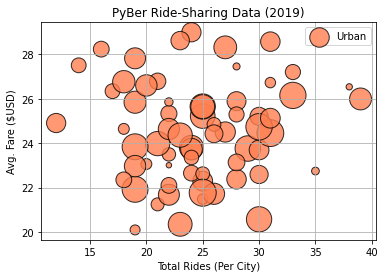

In [23]:
# Begin building scatter plots based on city, then combine them
plt.scatter(urban_ride_count, urban_avg_fare, 
            s=10*urban_driver_count, c="coral", 
            edgecolor="black", linewidths=1, 
            alpha=.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Avg. Fare ($USD)")
plt.xlabel("Total Rides (Per City)")
plt.grid(True)
plt.legend()
plt.show()

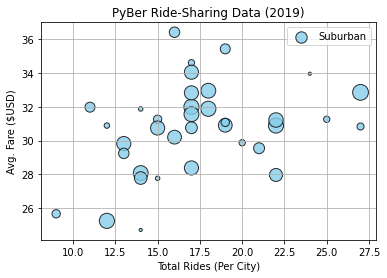

In [24]:
# Suburban cities plot
plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, 
            alpha=.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Avg. Fare ($USD)")
plt.xlabel("Total Rides (Per City)")
plt.grid(True)
plt.legend()
plt.show()

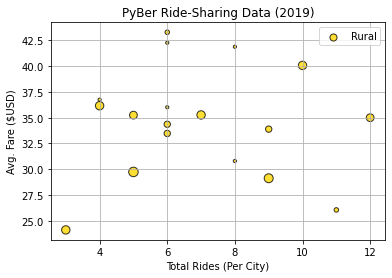

In [25]:
# Rural cities plot
plt.scatter(rural_ride_count, rural_avg_fare, 
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1, 
            alpha=.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Avg. Fare ($USD)")
plt.xlabel("Total Rides (Per City)")
plt.grid(True)
plt.legend()
plt.show()

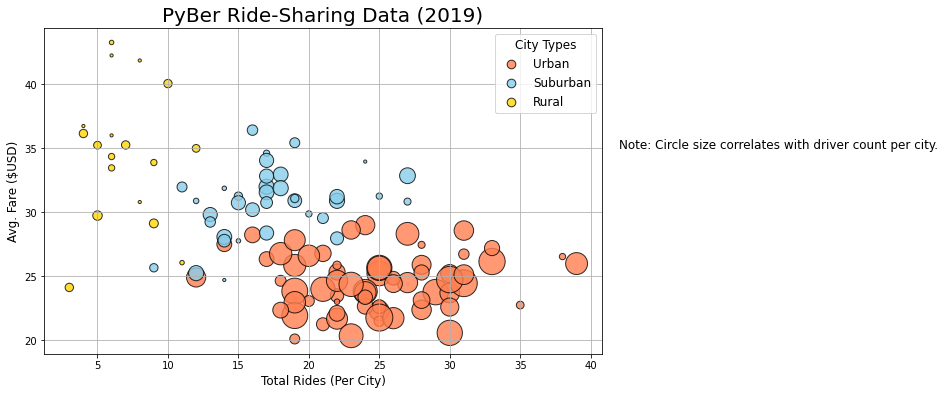

In [30]:
# combine them into 1 scatter plot
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, urban_avg_fare, 
            s=10*urban_driver_count, c="coral", 
            edgecolor="black", linewidths=1, 
            alpha=.8, label="Urban")

plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, 
            alpha=.8, label="Suburban")
plt.scatter(rural_ride_count, rural_avg_fare, 
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1, 
            alpha=.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Avg. Fare ($USD)", fontsize=12)
plt.xlabel("Total Rides (Per City)", fontsize=12)
plt.grid(True)
lgnd = plt.legend(fontsize=12, mode="expanded",
                 scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
plt.savefig("analysis/PyberPlot1.png")
plt.show()

In [29]:
# Save the figure.


<Figure size 432x288 with 0 Axes>